# Stack Overflow 2019 Survey Analysis: Data Scientists
### Data Scientists, Who are they? What do they know? Do they know things? Lets Find Out!

<br><br>
The motivation behind this analysis is to gain more insights about the role of a Data Scientist and how it compares to other developers. As it is a relatively new role compared to others, there is often no clear understanding of what the job of a data scientist involves or what the background of a data scientist is, a fact that is reflected on the job description in many job postings asking for a data scientist. In addition, we would like to compare the data scientists with the other developer roles in terms of women representation in the field. Finally, we would like to see if data scientists are actually paid more than other developers and what correlates with a higher salary for a data scientist.
<br>

So we are asking the data:

###  QUESTION 1. What is the educational background of data scientists and how is it different from other roles?
- Do more data scientists have degrees higher than a Bachelor's degree (Master's or Phds) compared to other developers?
- Are there more data scientists coming from a non-CS backgrounds than other developers? 

### QUESTION 2. Is the gender gap smaller in data scientist than other roles?
Developer world is still very male-dominated. Are data scientists doing better in terms of gender balance in the workspace?


### QUESTION 3. What correlates with higher salary? (years of professional coding experience, education level, country, tools)
- Do data scientists get payed more than other roles? Compare each role salary vs years of experience, education.
- What programming languages and tools do data scientists use ? Is there any difference compared to other developers in general? Which tools I need to master to be paid more? Which combination of role titles gets paid more? 
- Does a software engineering background leads to a higher salary compared to an academic background?

### (4. What correlates with Job satisfaction in Data Scientists and is there any difference compared to other roles)



In [1]:
# To align plots in the middle of the notebook

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from cycler import cycler
plt.style.use('bmh')
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

## Data exploration

First of all, let's take a look at the data:

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
print('The are {} respondents and {} columns  in the dataset'.format(df.shape[0],df.shape[1]))

The are 88883 respondents and 85 columns  in the dataset


In [5]:
# Show column names
df.columns.values

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

In [6]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    # We need to turn it to a list because otherwise it returns a Series object!
    desc = list(schema[schema.Column == column_name]['QuestionText'])[0]
    return desc

## Data Cleaning

In [7]:
# Drop Respondent
df = df.drop('Respondent', axis=1)

# Convert YearsCodePro column to int

df['YearsCodePro'].value_counts()

df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})
df['YearsCodePro'] = df['YearsCodePro'].astype(float)
df['YearsCodePro'].describe()

count    74331.000000
mean         8.185865
std          7.644169
min          0.500000
25%          3.000000
50%          6.000000
75%         11.000000
max         55.000000
Name: YearsCodePro, dtype: float64

### Remove students

For the scope of this analysis, we are only interested in professional developers. Therefore we are going to exlude
from the dataset those who are currelntly students which is about 1/4 of the respondents.

In [8]:
print(get_description('Student'))
student_status = df['Student'].value_counts(normalize=True);
print(round(student_status,2))

df = df[df['Student'].str.contains("No",na=False)]
df.shape

Are you currently enrolled in a formal, degree-granting college or university program?
No                0.76
Yes, full-time    0.18
Yes, part-time    0.06
Name: Student, dtype: float64


(65816, 84)

### Find the Data Scientists

In [9]:
get_description('DevType')

'Which of the following describe you? Please select all that apply.'

In [10]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                         7296
Developer, back-end                                                                                                                                                                                                                                           4258
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                2119
Developer, front-end                                                                                                                                                                                                           

<br> As we see, every respondent can have multiple role titles. We need to clean this column to understand the count per role title.<br>

In [11]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [12]:
def clean_and_plot(df, column_name, possible_vals, title, plot=True, percentage=True):
    '''
    INPUT 
        df - a dataframe holding the column to clean
        column_name - the question that has multiple possible answers
        possible_vals - a list with the possible answers for that question
        title - string of the plot title
        axis - axis object
        plot - bool providing whether or not you want a plot back
        percentage - bool providing whether we want the result as a percentage or a total count
        
    OUTPUT
        new_df - a dataframe with the percentage of the individuals per possible answer
        Displays a plot for the column.
    '''
    col = df[column_name].value_counts().reset_index()
    col.rename(columns={'index': 'type', column_name: 'count'}, inplace=True)
    count_df = total_count(col, 'type', 'count', possible_vals)

    count_df.set_index('type', inplace=True)
    if plot:
        if percentage:
           (count_df/count_df.sum()).plot(kind='barh', legend=None)
        else:
            count_df.plot(kind='barh', legend=None);
        plt.title(title);
        plt.gca().invert_yaxis()
        plt.show()
    if percentage:
          new_df = count_df/count_df.sum()
    else:
        new_df = count_df
    new_df.index.name = None
    return new_df


In [13]:
# Clean data for DevType

devttype_vals = ["Academic Researcher", "Data or business analyst", "Data scientist or machine learning specialist",
                 "Database administrator", "Designer", "Developer, full-stack", "Developer, back-end", 
                 "Developer, front-end", "Developer, mobile", "Developer, desktop or enterprise applications",
                 "Developer, embedded applications or devices", "Developer, QA or test", "DevOps specialist",
                 "Developer, game or graphics", "Educator", "Engineering manager", "Engineer, data",
                 "Engineer, site reliability", "Marketing or sales professional", "Product manager", "Scientist",
                 "Senior Executive (CSuite, VP, etc.)", "Student", "System administrator", "Other"]

devtype_df = clean_and_plot(df,'DevType', devttype_vals, "Developer Type", plot=False, percentage=False)   
devtype_df

,count
"Developer, full-stack",33646
"Developer, back-end",31703
"Developer, front-end",20509
"Developer, desktop or enterprise applications",13450
"Developer, mobile",10808
DevOps specialist,7480
Database administrator,7375
System administrator,6942
Designer,6582
"Developer, embedded applications or devices",5389


<br>We would like to explore all respondents that indentified with at least one data-related role, that is `Data or business analyst`, `Data scientist or machine learning specialist` and `Data engineer`. <br><br> 
This is because in the real world most of the times their duties are interchangeable (job listings that ask for Data Analysts require the work of a Data Scientist or Data Scientists often need to perform tasks that are more of a Data Engineer's responsability, especially in smaller companies). <br><br>
So we will keep 4 dataframes, one for all data roles and one for each role in order to allow us to be more specific our generic in different points of the analysis.

In [14]:
# Keep all data related roles in the df_data dataframe
df_data = df[df['DevType'].str.contains("Data | data",na=False)]
df_data.shape

# Data scientists
df_ds = df[df['DevType'].str.contains("Data scientist",na=False)]
df_ds.shape

# Data engineers
df_deng = df[df['DevType'].str.contains("Engineer, data",na=False)]
df_deng.shape

# Data analysts
df_da = df[df['DevType'].str.contains("analyst",na=False)]
df_da.shape

(4721, 84)

In [15]:
# Functions to compare the data scientists to all developers based on a column

def compare(df1, df2, column_name):
    '''
    INPUT 
        df1 - a dataframe related to data scientists
        df2 - a dataframe of all developers
        column_name - name of the column by which we want to compare the two dataframes
      
    OUTPUT
        compare_df - a dataframe with rows the values of the column_name and 2 columns, the data scientists and all the
                     respondents
    '''
    
    vals1 = df1[column_name].value_counts(normalize=True);
    vals2 = df2[column_name].value_counts(normalize=True);

    compare_df = vals1.rename('data').to_frame()\
               .join(vals2.rename('all').to_frame())

    return compare_df

def remove_parentheses(df):
    '''
    INPUT:
    df - the pandas dataframe you want to edit

    OUTPUT:
    new_df - a dataframe without parentheses in the index
    '''
    for i in range(df.shape[0]):
        value = df.index[i]
        result = re.sub("[\(\[].*?[\)\]]", "", value)
        df = df.rename(index={value : result})
    return df


def compare_plot(compare_df, plot_title, parentheses=True):
    '''
    Prints a barplot comparing the columns of the compare_df.
    
    INPUT 
        compare_df - a dataframe related to data scientists
        plot_title - a dataframe of all developers
        parentheses - boolean to choose we want to keep parentheses in the xticks or not. This is helpful as some answers
                      are particulary long and are better displayed when omitting the parentheses

    OUTPUT
       None
    '''
    
    if(not parentheses):
        compare_df = remove_parentheses(compare_df)
    
    index = np.arange(compare_df.shape[0])
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(10, 10))


    ax.barh(index, compare_df['data'], bar_width,
                    label="Data Scientists", color="#66c2a5")

    ax.barh(index+bar_width, compare_df['all'],
                     bar_width, label="All Developers",color="#8da0cb")
    

    ax.set_xlabel('Percentage (%)',fontsize=15)
    ax.set_title(plot_title, fontsize=20)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(compare_df.index)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(fontsize=15, loc='lower right')
    ax.invert_yaxis()
    plt.show()


### Are data scientists developers? 

We said we will compare data scientists with other developers. But do data scientists consider themselves as developers? Let's see what they think.

In [16]:
get_description('MainBranch')

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [17]:
main_branch_df = compare(df_ds, df, 'MainBranch')
main_branch_df.head()

,data,all
I am a developer by profession,0.743482,0.826048
"I am not primarily a developer, but I write code sometimes as part of my work",0.203678,0.087533
I am a student who is learning to code,0.020251,0.033402
I code primarily as a hobby,0.017225,0.033708
"I used to be a developer by profession, but no longer am",0.015363,0.019309


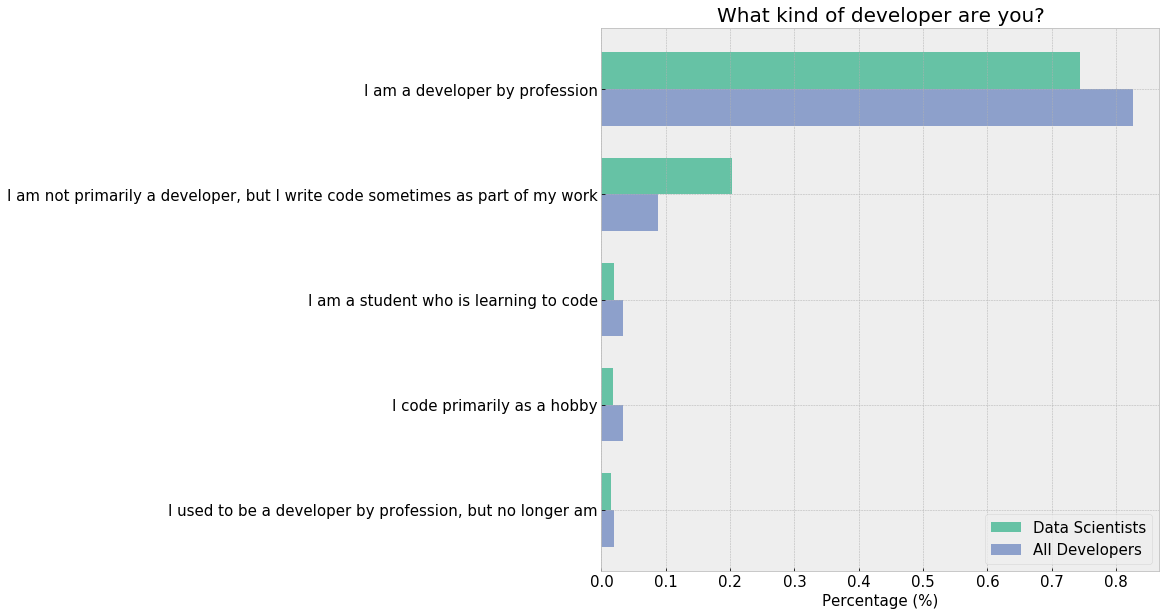

In [18]:
compare_plot(main_branch_df, "What kind of developer are you?", parentheses=True)

We see a clear difference in the answers, as **20% of Data Scientists** think they are **not primarily a developer** comparing to the **9%** of all respondents.

##  QUESTION 1. What is the educational background of data scientists and how is it different from other roles?

Now that we explored the data, let's go an answer our first question.<br><br>


### Highest level of formal education
First, we want to know if data scientists have an education level higher than a Bachelor's degree (Master's or Phds) compared to other developers.

In [19]:
get_description('EdLevel')

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [20]:
#Provide a pandas series of the counts for each FormalEducation status

ed_vals_data = df_ds['EdLevel'].value_counts(normalize=True);
ed_vals = df['EdLevel'].value_counts(normalize=True);

df_edu_data = ed_vals_data.rename_axis('education').reset_index(name='percentage')
high_edu_data = df_edu_data['percentage'][1]+df_edu_data['percentage'][3]
print("Data scientits: {:.2f}% have a Master's or a doctoral degree.".format(high_edu_data))
df_edu_data.head()      
   

Data scientits: 0.39% have a Master's or a doctoral degree.


,education,percentage
0,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",0.392281
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",0.330526
2,"Other doctoral degree (Ph.D, Ed.D., etc.)",0.162105
3,Some college/university study without earning ...,0.057778
4,"Secondary school (e.g. American high school, G...",0.022222


In [21]:
df_edu = ed_vals.rename_axis('education').reset_index(name='percentage')
high_edu = df_edu['percentage'][1]+df_edu['percentage'][5]
print("All developers: {:.2f}% have a Master's or a doctoral degree.".format(high_edu))
df_edu.head()   

All developers: 0.28% have a Master's or a doctoral degree.


,education,percentage
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",0.477425
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",0.252835
2,Some college/university study without earning ...,0.107794
3,"Secondary school (e.g. American high school, G...",0.061543
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",0.033468


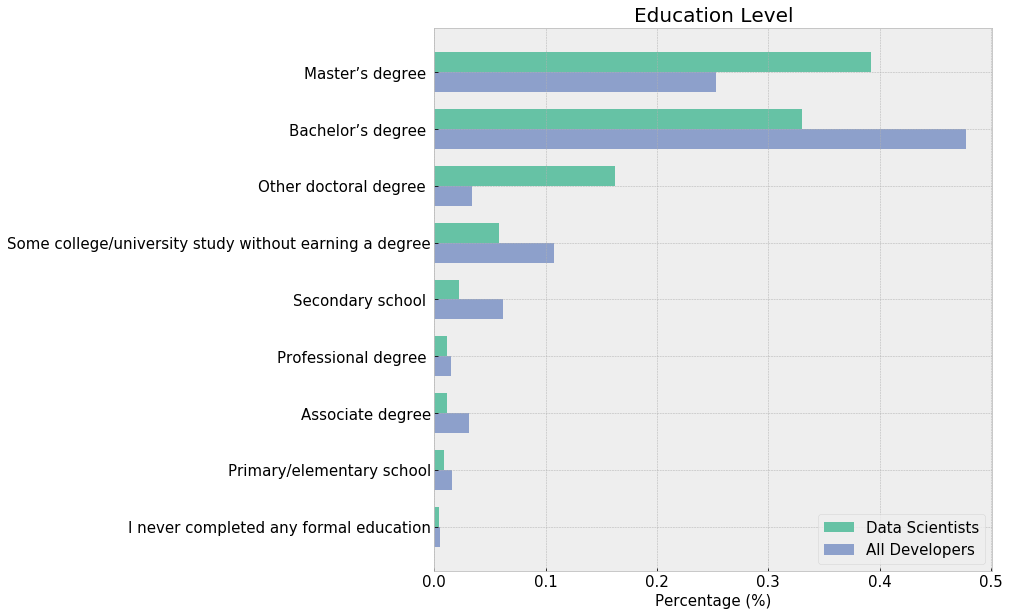

In [22]:
graph_df = compare(df_ds, df, 'EdLevel')
compare_plot(graph_df, 'Education Level', parentheses=False)

### Undergraduate Major

Now let's explore the second part of Question 1. <br>
Are there more data scientists coming from a non-CS backgrounds than other developers?

In [23]:
get_description('UndergradMajor')

'What was your main or most important field of study?'

In [24]:
major_df = compare(df_ds, df, 'UndergradMajor')
major_df

,data,all
"Computer science, computer engineering, or software engineering",0.479455,0.609707
Mathematics or statistics,0.142574,0.040503
"A natural science (ex. biology, chemistry, physics)",0.131436,0.045557
"Another engineering discipline (ex. civil, electrical, mechanical)",0.109653,0.087745
"Information systems, information technology, or system administration",0.035891,0.069876
"A social science (ex. anthropology, psychology, political science)",0.031683,0.019775
"A business discipline (ex. accounting, finance, marketing)",0.028218,0.025919
"A humanities discipline (ex. literature, history, philosophy)",0.016584,0.023876
Web development or web design,0.007426,0.040027
"Fine arts or performing arts (ex. graphic design, music, studio art)",0.007178,0.019145


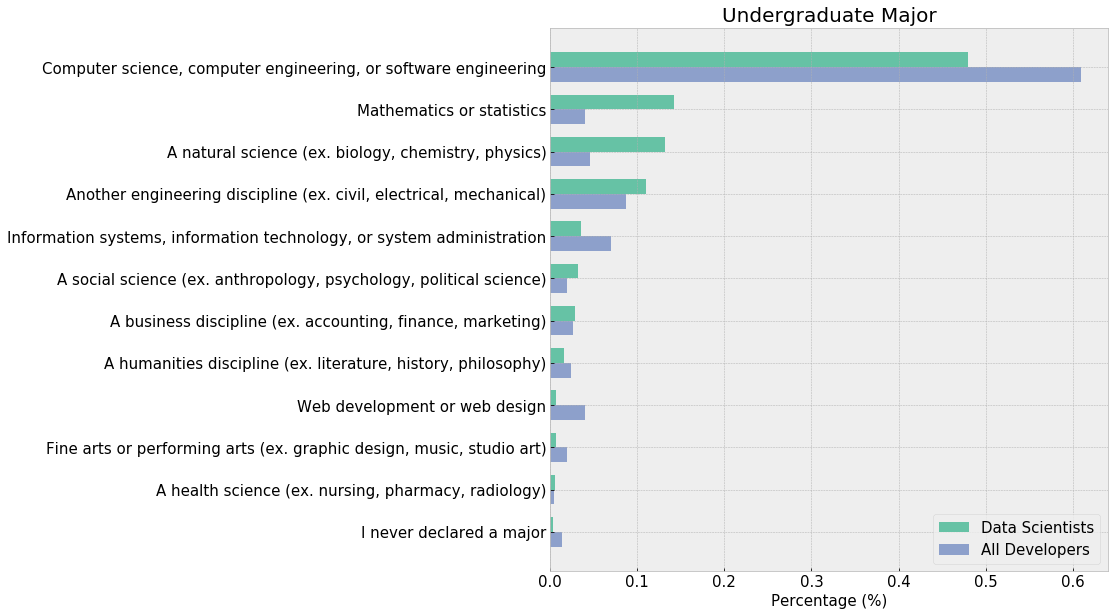

In [25]:
compare_plot(major_df, 'Undergraduate Major')

### Explore other education

Finally let's check if there are any differences in other forms of education, that respondents have participated in like bootcamps or online courses.

In [26]:
get_description('EduOther')

'Which of the following types of non-degree education have you used or participated in? Please select all that apply.'

In [27]:
df['EduOther'].value_counts()

other_edu_vals = ["Taught yourself a new language, framework, or tool without taking a formal course",
                   "Taken an online course in programming or software development (e.g. a MOOC)",
                   "Contributed to open source software", "Received on-the-job training in software development",
                   "Participated in a full-time developer training program or bootcamp", "None of these",
                   "Taken a part-time in-person course in programming or software development",
                   "Completed an industry certification program (e.g. MCPD)", "Participated in a hackathon",
                   "Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)"]

props_df = clean_and_plot(df,'EduOther', other_edu_vals, "Other Education",plot=False)
props_df_data = clean_and_plot(df_ds,'EduOther', other_edu_vals, "Other Education", plot=False)

props_df_data = props_df_data.rename(columns={"count": "data"})
props_df = props_df.rename(columns={"count": "all"})

other_edu_df = props_df_data.join(props_df)
other_edu_df

,data,all
"Taught yourself a new language, framework, or tool without taking a formal course",0.242779,0.264450
Taken an online course in programming or software development (e.g. a MOOC),0.192391,0.178287
Contributed to open source software,0.132650,0.129448
Received on-the-job training in software development,0.109047,0.127159
Participated in a hackathon,0.093460,0.077372
"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",0.086589,0.073027
Taken a part-time in-person course in programming or software development,0.056496,0.054407
Completed an industry certification program (e.g. MCPD),0.044344,0.049270
Participated in a full-time developer training program or bootcamp,0.042245,0.046579


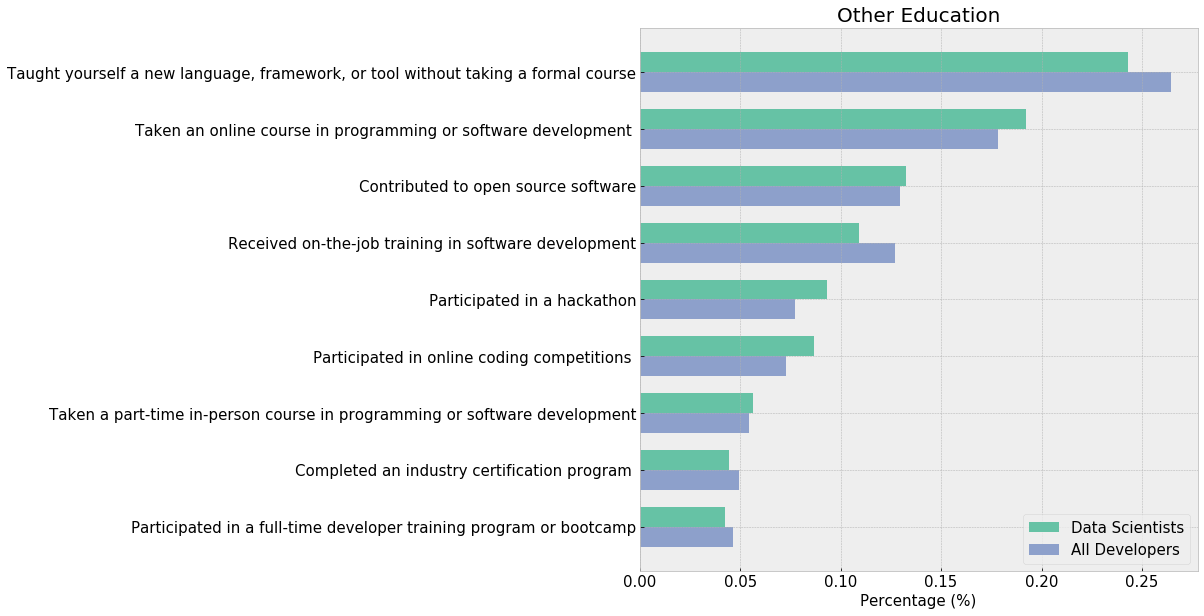

In [28]:
compare_plot(other_edu_df, 'Other Education', parentheses=False)

### Results for Question 1

Data Scientist have a different educational background compared to other developer roles.
- Regarding the highest level of formal education obtained, **39% of Data Scientists have completed a Master's or a Phd degree** compared to **28%** of the developers in general.
- Regarding the undergraduate major, **48% of Data Scientists have completed a Computer Science or Software Engineering related degree** compared to **61%** of the developers in general.
- There is no difference between data scientists and other developers regarding other types of non-degree education that they have participated in. About one in four data scientists have taught themselves a language or tool and one in five have taken an online course.

## QUESTION 2. Is the gender gap smaller in data scientists than in other roles?



In [29]:
data_gender_df = compare(df_ds, df, 'Gender')
data_gender_df

,data,all
Man,0.911701,0.914870
Woman,0.075616,0.073159
"Non-binary, genderqueer, or gender non-conforming",0.006939,0.006722
"Man;Non-binary, genderqueer, or gender non-conforming",0.002393,0.002037
"Woman;Non-binary, genderqueer, or gender non-conforming",0.001914,0.001896
Woman;Man,0.000957,0.000799
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",0.000479,0.000517


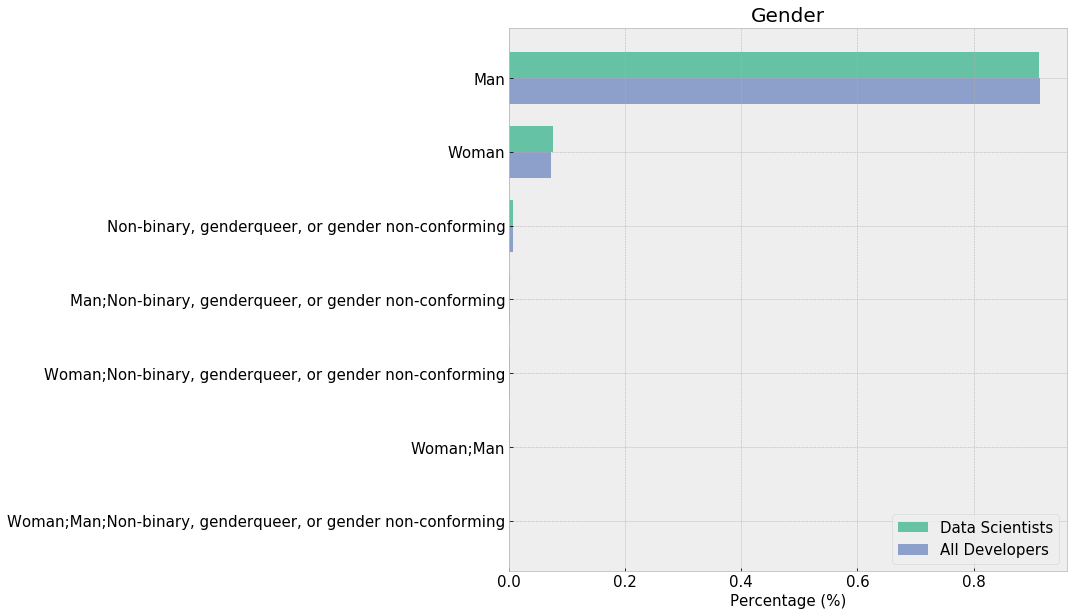

In [30]:
compare_plot(data_gender_df,"Gender")

We clearly see that there are dramatically more men than women, and the differences between all developers and data scientists is very small. <br>
Therefore, in order to better understand the representation from men and women in different developer roles, we will compare data scientists with other developer types.

In [31]:
# Get dataframes of some of the rest developer types
df_devops = df[df['DevType'].str.contains("DevOps ",na=False)]
df_fullstack = df[df['DevType'].str.contains("full-stack",na=False)]
df_frontend = df[df['DevType'].str.contains("front-end",na=False)]
df_sre = df[df['DevType'].str.contains("reliability",na=False)]
df_designer = df[df['DevType'].str.contains("Designer",na=False)]
df_mobile = df[df['DevType'].str.contains("mobile",na=False)]
df_sysad = df[df['DevType'].str.contains("System administrator",na=False)]
df_qa = df[df['DevType'].str.contains("QA",na=False)]


# Choose some to plot in order to compare
dev_dataframes = [df_ds, df_devops, df_fullstack, df_frontend , df_sre, df_designer, df_mobile, df_sysad]
dev_roles = ["Data Scientist", "DevOps Specialist", "Full-stack Developer", "Front-End Developer",
            "Site Reliability Engineer", "Designer", "Mobile Developer", "System Administrator"]

In [32]:
devtype_df

,count
"Developer, full-stack",33646
"Developer, back-end",31703
"Developer, front-end",20509
"Developer, desktop or enterprise applications",13450
"Developer, mobile",10808
DevOps specialist,7480
Database administrator,7375
System administrator,6942
Designer,6582
"Developer, embedded applications or devices",5389


In [33]:
df['Gender'].value_counts()

Man                                                            58387
Woman                                                           4669
Non-binary, genderqueer, or gender non-conforming                429
Man;Non-binary, genderqueer, or gender non-conforming            130
Woman;Non-binary, genderqueer, or gender non-conforming          121
Woman;Man                                                         51
Woman;Man;Non-binary, genderqueer, or gender non-conforming       33
Name: Gender, dtype: int64

In [34]:
def get_gender_ratio(df):
    gender = df['Gender'].value_counts(normalize=True);
    ratio = round(gender['Man'] / gender['Woman'], 1)
    return ratio

def get_gender_percentage(df):
    gender = df['Gender'].value_counts(normalize=True);
    percentage =  round( ((gender['Woman'] * 100 )/ gender['Man']), 1)
    return percentage

def get_count(df):
    return df.shape[0]

In [35]:
# Get percentages of men to women in all developer types
all_ratio = get_gender_ratio(df)

# Get ratios of men to women in different developer types
gender_ratio = []
for d in dev_dataframes:
    gender_ratio.append(get_gender_ratio(d))
    
gender_ratio   

[12.1, 32.1, 16.3, 11.8, 28.4, 13.2, 16.3, 29.7]

In [36]:
# Get percentages of women in all developer roles
p = get_gender_percentage(df)

# Get percentages of women in different developer roles
gender_percentage = []

for d in dev_dataframes:
    gender_percentage.append(get_gender_percentage(d))
    
gender_percentage

[8.3, 3.1, 6.1, 8.5, 3.5, 7.6, 6.1, 3.4]

In [37]:
# Get count of different developer roles
dev_count = []

for d in dev_dataframes:
    dev_count.append(get_count(d))
    
dev_count

[4314, 7480, 33646, 20509, 2434, 6582, 10808, 6942]

In [38]:
p, all_ratio

(8.0, 12.5)

In [39]:
# Create dataframe for scatter plot

gender_df = pd.DataFrame({
    'Count': dev_count,
    'Ratio': gender_ratio,
    'Percentage': gender_percentage,
    'Role': dev_roles
})

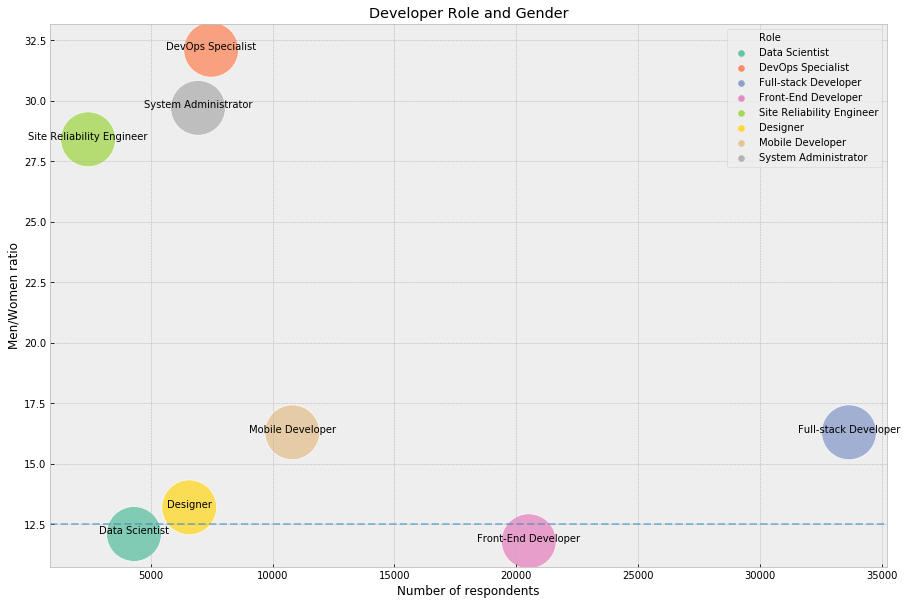

In [40]:
# Create scatter plot of ratio men to women for different developer roles

plt.figure(figsize = (15,10))

ax = sns.scatterplot(gender_df.Count, gender_df.Ratio, alpha = 0.8, hue=gender_df.Role, s=3000, palette="Set2")

ax.set(xlabel='Number of respondents', ylabel='Men/Women ratio', title='Developer Role and Gender')

# Create a line to show the average ratio 
ax.axhline(all_ratio, ls='--', alpha=0.5)

# For each point, we add a text inside the bubble
for line in range(0, gender_df.shape[0]):
     ax.text(gender_df.Count[line], gender_df.Ratio[line], gender_df.Role[line], horizontalalignment='center')

The graph above illustrates the men to women ratio for different developer roles. The blue line shows the average, which is a ratio of 12.5 meaning that there are 12.5 times more men than women in all developer roles.

In [41]:
gender_df.sort_values('Ratio')

,Count,Ratio,Percentage,Role
3,20509,11.8,8.5,Front-End Developer
0,4314,12.1,8.3,Data Scientist
5,6582,13.2,7.6,Designer
2,33646,16.3,6.1,Full-stack Developer
6,10808,16.3,6.1,Mobile Developer
4,2434,28.4,3.5,Site Reliability Engineer
7,6942,29.7,3.4,System Administrator
1,7480,32.1,3.1,DevOps Specialist


### Results for Question 2

In all types of developers, there is a huge difference in the number of respondents who identify as men than women. Remember that we only consider professional developers as we have removed students from the dataset. The total number of male professional developers who participated in the survey was 58387, whereas the number of female professional deveopers was 4669 corresponding to **ratio of 12.5 men to women for all developers**.<br>

Although initially we couldn't see if the gender gap was smaller in the data scientists than in developers in general, when we splitted by role, we saw that Data Scientists has a ratio of around 12.1, which one of the smallest, together with Front-end Developers(11.8) and Designers (13.2).

On the other hand, the graph illustrated that in certain roles, the gender gap grows much bigger: DevOps Specialists had the worst ratio(32.1), following by System Administratos(29.7) and Site Reliability Engineers (28.4)<br>

The results show that there are **12 times more men than women among Data Scientists**, a ratio that is relatively low compared to other types of developers like **DevOps Specialists**, who are **32 times more likely to men than women** <br>

In terms of percentages, **8.3% of Data Scientists** identified as women, compared to **8% of all developers**, while the percentage in other types of developers was **8.5%** of Front-End Developers, **6.1%** of Full-stack Developers, **3.5%** of Site Reliability Engineers and **3.1%** of DevOps Specialists.